In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

df_listings = pd.read_csv('./data/boston_airbnb/listings.csv')

df_listings['price'] = df_listings.price.apply(lambda x: x.strip('$'))
df_listings['price']  =  pd.to_numeric(df_listings['price'] ,errors='coerce')

df_listings.price.head()

0    250.0
1     65.0
2     65.0
3     75.0
4     79.0
Name: price, dtype: float64

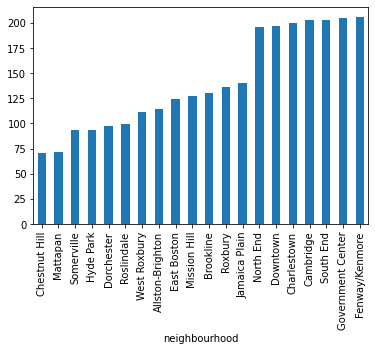

In [2]:
#rates by neighbourhood

df_n_p = df_listings.groupby(['neighbourhood']).mean()['price'].sort_values().dropna()
#print(df_n_p)
(df_n_p[:20]).plot(kind="bar");

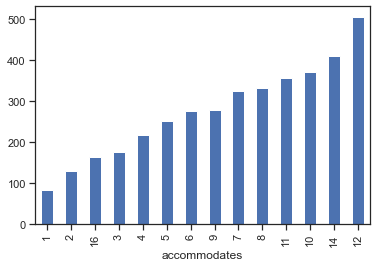

In [31]:
#rates by 

df_s = df_listings.groupby(['accommodates']).mean()['price'].sort_values().dropna()
#print(df_n_p)
(df_s[:20]).plot(kind="bar");

In [20]:
vals = df_listings['room_type'].value_counts()
print(vals)

Entire home/apt    2127
Private room       1378
Shared room          80
Name: room_type, dtype: int64


In [19]:
df_r = df_listings.groupby(['room_type']).sum()['number_of_reviews'].sort_values().dropna()
print(df_r)
#(df_r[:20]).plot(kind="bar");

room_type
Shared room          865
Private room       31306
Entire home/apt    36104
Name: number_of_reviews, dtype: int64


In [27]:
df_r = df_listings.groupby(['room_type']).mean()['number_of_reviews'].sort_values().dropna()
print(df_r)

room_type
Shared room        10.812500
Entire home/apt    16.974142
Private room       22.718433
Name: number_of_reviews, dtype: float64


In [26]:
df_r = df_listings.groupby(['room_type']).mean()['availability_365'].sort_values().dropna()
print(df_r)

room_type
Entire home/apt    176.262341
Private room       182.388244
Shared room        208.950000
Name: availability_365, dtype: float64


In [28]:
df_r = df_listings.groupby(['room_type']).mean()['price'].sort_values().dropna()
print(df_r)

room_type
Shared room         92.762500
Private room        93.307636
Entire home/apt    221.141643
Name: price, dtype: float64


In [3]:
df = df_listings.drop(['id','listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description',
       'experiences_offered', 'neighborhood_overview', 'notes', 'transit',
       'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url',
       'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name',
       'host_since', 'host_about',
       'host_thumbnail_url', 'neighbourhood_group_cleansed'
      ], axis=1, inplace=False)
df.columns


Index(['host_location', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'country_code', 'country', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'calendar_updated',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'calendar_last_scraped',
       'number_of_reviews', 'first_rev

In [4]:
def remove_usd_sign(df, col_names):
    for col_name in  col_names:
        try:
            df[col_name] =  df[col_name].replace({'\$':''}, regex = True)
            df[col_name] =  pd.to_numeric(df[col_name] ,errors='coerce')
        except:
                continue

    return df

In [5]:
df = remove_usd_sign(df, ['price','weekly_price', 'monthly_price','security_deposit', 'cleaning_fee', 'extra_people'])

df[['price','weekly_price', 'monthly_price','security_deposit', 'cleaning_fee', 'extra_people']].head()

price  weekly_price  monthly_price  security_deposit  cleaning_fee  \
0  250.0           NaN            NaN               NaN          35.0   
1   65.0         400.0            NaN              95.0          10.0   
2   65.0         395.0            NaN               NaN           NaN   
3   75.0           NaN            NaN             100.0          50.0   
4   79.0           NaN            NaN               NaN          15.0   

   extra_people  
0           0.0  
1           0.0  
2          20.0  
3          25.0  
4           0.0

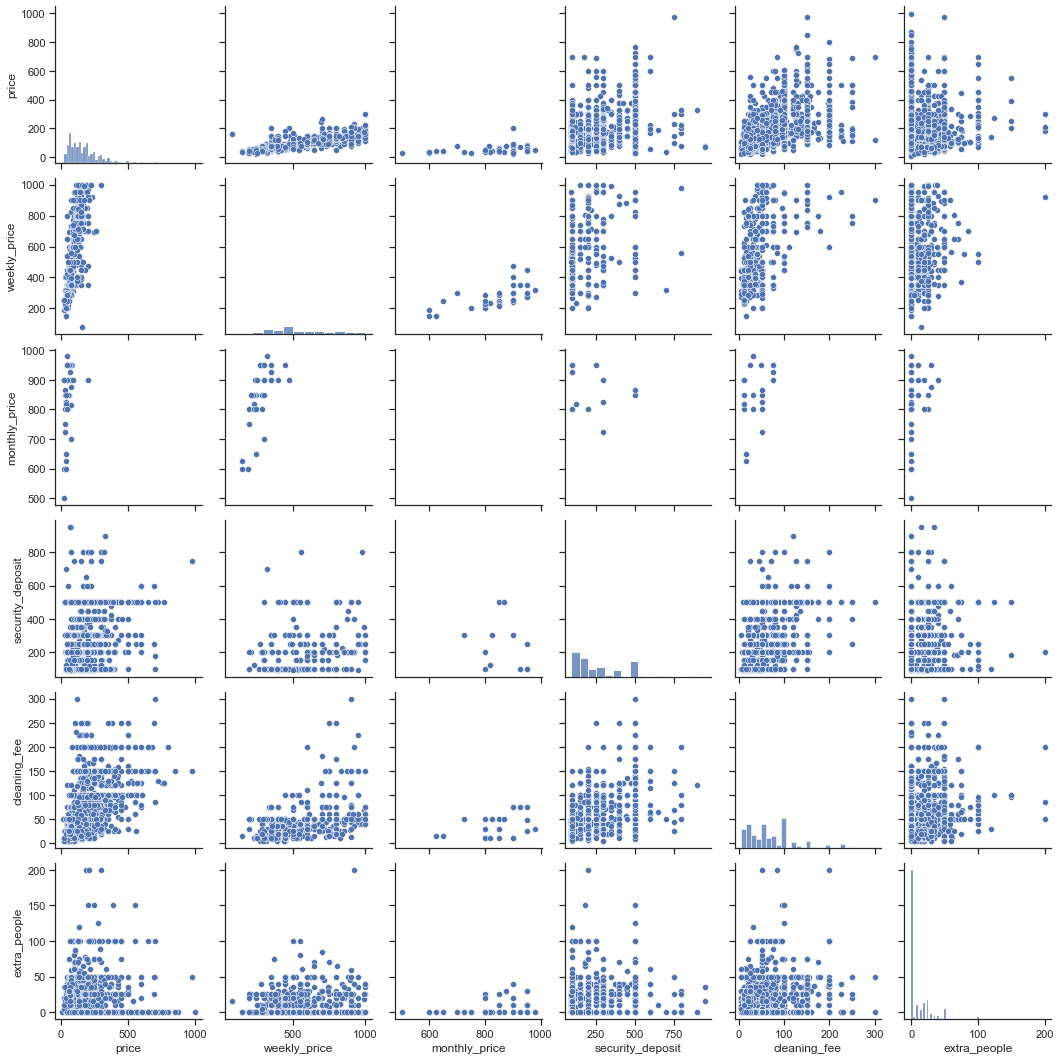

In [10]:
sns.set_theme(style="ticks")
sns.pairplot(df[['price','weekly_price', 'monthly_price','security_deposit', 'cleaning_fee', 'extra_people']])

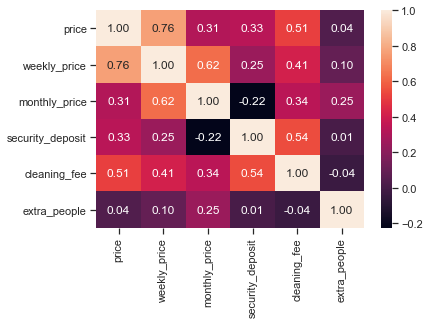

In [11]:
sns.heatmap(df[['price','weekly_price', 'monthly_price','security_deposit', 'cleaning_fee', 'extra_people']].corr(), annot=True, fmt=".2f");

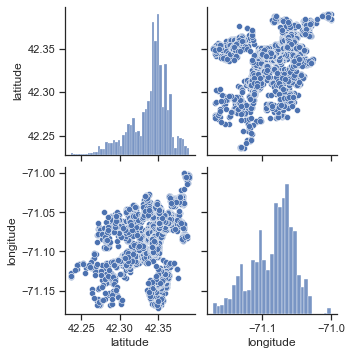

In [13]:
sns.pairplot(df[['latitude','longitude']])

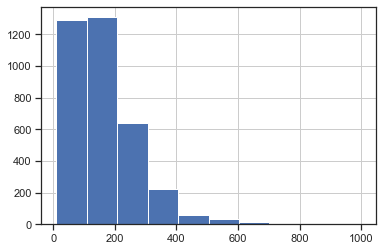

In [29]:
df['price'].hist();

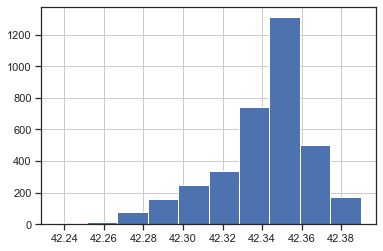

In [30]:
df['latitude'].hist();

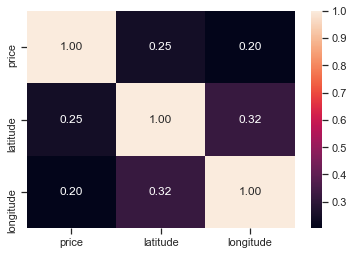

In [14]:
sns.heatmap(df[['price','latitude','longitude']].corr(), annot=True, fmt=".2f");